In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")

# Settings/names etc

In [2]:
abl1 = r"$\text{CLING}_{\text{MGP}}$"
abl2 = r"$\text{CLING}_{\text{ARD}}$" 

In [3]:
model_names = {
    'model_cling_AD_fast_new': 'CLING',
    'model_mofa_prune_0.01': 'MOFA',
    'model_muvi_0.01': 'MuVI',
    'model_pca_0.01': 'PCA',
    'model_tucker_0.01': 'Tucker',
    'model_cling_ablation1a': abl1,
    'model_cling_ablation2a': abl2
}

In [4]:
colors = ['#E24A33', '#348ABD', '#988ED5', '#FBC15E', '#8EBA42', '#FFB5B8', '#777777',"#A0A0A0"]

In [5]:
color_dict = {
    "CLING": colors[0],       
    "MOFA": colors[1],      
    "MuVI": colors[2],     
    "PCA": colors[3],  
    "Tucker": colors[4],
    abl1: colors[6],
    abl2: colors[7]
}

In [6]:
hue_order = ['CLING', 'MOFA', 'MuVI', 'PCA', 'Tucker', abl1, abl2]

# Plot - function

In [7]:
def plot_figure(df, baseline_K): 
    fig, axes = plt.subplots(4, 3, figsize=(15*3/4, 12*3/4), sharex='col', sharey='row')

    flier_props = dict(marker='o', markersize=3, alpha=0.6)

    x_axis_names = ['K', 'noise_std', 'sparsity']
    x_axis_names_nice = ['K', 'Noise', 'Sparsity']
    y_axis_names = ['Estimated K', 'Total Var. Expl.', 'Spearman Cor. (Factors)', 'Jaccard Index (Weights)']
    titles_scenarios = ['Varying number of factors', 'Varying noise level', 'Varying sparsity level']

    for i, result in enumerate(["K_est", "Var_exp_total", "Cor_factors", 'Jaccard_index']):
        for j, scenario in enumerate(["scenario1", "scenario2", "scenario3"]):
            df_tmp = df.loc[df[scenario], :]
            if i < 2:
                sns.barplot(df_tmp, x=x_axis_names[j], y=result, hue='model', hue_order=hue_order, ax=axes[i, j], palette=color_dict,
                            errorbar=("sd"))
            else:
                sns.barplot(df_tmp, x=x_axis_names[j], y=result, hue='model', hue_order=hue_order, ax=axes[i, j], palette=color_dict,
                            errorbar=("sd"))

            axes[i,j].get_legend().remove()
            if i == 0:
                axes[i,j].set_title(titles_scenarios[j])
            axes[i,j].set_ylabel(y_axis_names[i])

            if i == 0 and j == 0:
                for k_ind, k in enumerate(np.sort(df['K'].unique())):
                    axes[i,j].hlines(y=k, xmin=k_ind-0.5, xmax=k_ind+0.5, linestyle='dotted', color='black')
            if i == 0 and j == 1:
                axes[i,j].hlines(y=baseline_K, xmin=0-0.5, xmax=len(df['noise_std'].unique())-0.5, linestyle='dotted', color='black')
            if i == 0 and j == 2:
                axes[i,j].hlines(y=baseline_K, xmin=0-0.5, xmax=len(df['sparsity'].unique())-0.5, linestyle='dotted', color='black')
            if i > 0:
                axes[i,j].hlines(y=1, xmin=0-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5, linestyle='dotted', color='black')

            if i == 3:
                axes[i,j].set_xlabel(x_axis_names_nice[j])

    handles, labels = axes[0, 0].get_legend_handles_labels()
    ncol = 4
    order = sorted(range(len(labels)), key=lambda i: i % ncol)  # <-- row-wise
    handles = [handles[i] for i in order]
    labels = [labels[i] for i in order]
    fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, 0.005), ncol=ncol)
    plt.tight_layout(rect=[0, 0.05, 1, 1])

In [8]:
def plot_figure_mofa(df, baseline_K): 
    fig, axes = plt.subplots(4, 3, figsize=(15*3/4, 12*3/4), sharex='col', sharey='row')

    flier_props = dict(marker='o', markersize=3, alpha=0.6)

    x_axis_names = ['K', 'noise_std', 'sparsity']
    x_axis_names_nice = ['K', 'Noise', 'Sparsity']
    y_axis_names = ['Estimated K', 'Total Var. Expl.', 'Spearman Cor. (Factors)', 'Jaccard Index (Weights)']
    titles_scenarios = ['Varying number of factors', 'Varying noise level', 'Varying sparsity level']

    for i, result in enumerate(["K_est", "Var_exp_total", "Cor_factors", 'Jaccard_index']):
        for j, scenario in enumerate(["scenario1", "scenario2", "scenario3"]):
            df_tmp = df.loc[df[scenario], :]
            if i < 2:
                sns.barplot(df_tmp, x=x_axis_names[j], y=result, hue='model', hue_order=hue_order, ax=axes[i, j], palette=color_dict,
                            errorbar=("sd"))
            else:
                sns.barplot(df_tmp, x=x_axis_names[j], y=result, hue='model', hue_order=hue_order, ax=axes[i, j], palette=color_dict,
                            errorbar=("sd"))


            axes[i,j].get_legend().remove()
            if i == 0:
                axes[i,j].set_title(titles_scenarios[j])
            axes[i,j].set_ylabel(y_axis_names[i])

            if i == 0 and j == 0:
                for k_ind, k in enumerate(np.sort(df['K'].unique())):
                    axes[i,j].hlines(y=k, xmin=k_ind-0.5, xmax=k_ind+0.5, linestyle='dotted', color='black')
            if i == 0 and j == 1:
                axes[i,j].hlines(y=baseline_K, xmin=0-0.5, xmax=len(df['noise_std'].unique())-0.5, linestyle='dotted', color='black')
            if i == 0 and j == 2:
                # axes[i,j].hlines(y=baseline_K, xmin=1-0.5, xmax=len(df['sparsity'].unique())-0.5, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=0, xmin=0-0.5, xmax=0.5, linestyle='dotted', color='black')
                axes[i,j].hlines(y=baseline_K, xmin=0-0.5, xmax=len(df['sparsity'].unique())-0.5, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=baseline_K, xmin=0-0.5, xmax=len(df['sparsity'].unique())-0.5-1, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=0, xmin=len(df['sparsity'].unique())-0.5-1, xmax=len(df['sparsity'].unique())-0.5, linestyle='dotted', color='black')
            if i > 0 and j < 2:
                axes[i,j].hlines(y=1, xmin=0-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5, linestyle='dotted', color='black')
            if i == 1 and j == 2:
                # axes[i,j].hlines(y=1, xmin=1-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=0, xmin=0-0.5, xmax=0.5, linestyle='dotted', color='black')
                axes[i,j].hlines(y=1, xmin=0-0.5, xmax=len(df['sparsity'].unique())-0.5, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=1, xmin=0-0.5, xmax=len(df['sparsity'].unique())-0.5-1, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=0, xmin=len(df['sparsity'].unique())-0.5-1, xmax=len(df['sparsity'].unique())-0.5, linestyle='dotted', color='black')
            if i == 2 and j == 2:
                # axes[i,j].hlines(y=1, xmin=1-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=0, xmin=0-0.5, xmax=0.5, color='lightgray')
                axes[i,j].hlines(y=1, xmin=0-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=1, xmin=0-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5-1, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=0,  xmin=len(df['sparsity'].unique())-0.5-1, xmax=len(df['sparsity'].unique())-0.5, color='lightgray')
            if i == 3 and j == 2:
                # axes[i,j].hlines(y=1, xmin=1-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=0, xmin=0-0.5, xmax=0.5, color='lightgray')
                axes[i,j].hlines(y=1, xmin=0-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=1, xmin=0-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5-1, linestyle='dotted', color='black')
                # axes[i,j].hlines(y=0, xmin=len(df['sparsity'].unique())-0.5-1, xmax=len(df['sparsity'].unique())-0.5, color='lightgray')


            if i == 3:
                axes[i,j].set_xlabel(x_axis_names_nice[j])

    handles, labels = axes[0, 0].get_legend_handles_labels()
    ncol = 4
    order = sorted(range(len(labels)), key=lambda i: i % ncol)  # <-- row-wise
    handles = [handles[i] for i in order]
    labels = [labels[i] for i in order]
    fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, 0.005), ncol=ncol)
    plt.tight_layout(rect=[0, 0.05, 1, 1])

In [10]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.patches import Rectangle

class TopAlignedPatchHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # shrink height so it aligns with top line
        patch = Rectangle([xdescent, ydescent + height*0.55],  # shift upwards
                          width, height*0.4,
                          facecolor=orig_handle.get_facecolor(),
                          edgecolor=orig_handle.get_edgecolor(),
                          transform=trans)
        return [patch]
def plot_figure_smaller(df, baseline_K): 
    fig, axes = plt.subplots(4, 3, figsize=(15*2.75/4, 12*2.75/4), sharex='col', sharey='row')

    flier_props = dict(marker='o', markersize=3, alpha=0.6)

    x_axis_names = ['K', 'noise_std', 'sparsity']
    x_axis_names_nice = ['K', 'Noise', 'Sparsity']
    y_axis_names = ['Estimated K', 'Total Var. Expl.', 'Spearman Cor. (Factors)', 'Jaccard Index (Weights)']
    titles_scenarios = ['Varying number of factors', 'Varying noise level', 'Varying sparsity level']

    for i, result in enumerate(["K_est", "Var_exp_total", "Cor_factors", 'Jaccard_index']):
        for j, scenario in enumerate(["scenario1", "scenario2", "scenario3"]):
            df_tmp = df.loc[df[scenario], :]
            if i < 2:
                sns.barplot(df_tmp, x=x_axis_names[j], y=result, hue='model', hue_order=hue_order, ax=axes[i, j], palette=color_dict,
                            errorbar=("sd"))
            else:
                sns.barplot(df_tmp, x=x_axis_names[j], y=result, hue='model', hue_order=hue_order, ax=axes[i, j], palette=color_dict,
                            errorbar=("sd"))
                # sns.boxplot(df_tmp, x=x_axis_names[j], y=result, hue='model', hue_order=hue_order, ax=axes[i, j], 
                            # flierprops=flier_props, palette=color_dict)

            axes[i,j].get_legend().remove()
            if i == 0:
                axes[i,j].set_title(titles_scenarios[j])
            axes[i,j].set_ylabel(y_axis_names[i])

            if i == 0 and j == 0:
                for k_ind, k in enumerate(np.sort(df['K'].unique())):
                    axes[i,j].hlines(y=k, xmin=k_ind-0.5, xmax=k_ind+0.5, linestyle='dotted', color='black')
            if i == 0 and j == 1:
                axes[i,j].hlines(y=baseline_K, xmin=0-0.5, xmax=len(df['noise_std'].unique())-0.5, linestyle='dotted', color='black')
            if i == 0 and j == 2:
                axes[i,j].hlines(y=baseline_K, xmin=0-0.5, xmax=len(df['sparsity'].unique())-0.5, linestyle='dotted', color='black')
            if i > 0:
                axes[i,j].hlines(y=1, xmin=0-0.5, xmax=len(df_tmp[x_axis_names[j]].unique())-0.5, linestyle='dotted', color='black')

            if i == 3:
                axes[i,j].set_xlabel(x_axis_names_nice[j])

    handles, labels = axes[0, 0].get_legend_handles_labels()
    handles = handles[:5] + [ plt.Line2D([], [], color='none')] + handles[5:]
    labels = labels[:5] + [""] + labels[5:]
    # ncol = 4
    # order = sorted(range(len(labels)), key=lambda i: i % ncol)  # <-- row-wise
    # handles = [handles[i] for i in order]
    # labels = [labels[i] for i in order]
    fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Models")
    plt.tight_layout(rect=[0, 0.05, 1, 1])

# Comparison of methods

## Figure 2 - main text (param_sim_1)

In [9]:
df = []
df_list = ['model_pca_0.01',
           'model_mofa_prune_0.01', 
           'model_tucker_0.01',
           'model_muvi_0.01',
           'model_cling_AD_fast_new',
           'model_cling_ablation1', 'model_cling_ablation1a', 'model_cling_ablation2a'
           ]

for i in df_list:
    df_tmp = pd.read_csv('param_sim_1/'+i+'.csv')
    df.append(df_tmp)
df = pd.concat(df)

# filter out results we don't need
df = df[df['noise_std'] < 2.5]
df = df[df['noise_std'] > 0.25]
df = df[df['K'] != 7]
df = df.reset_index()

# change names of models
df = df[df['model'] != 'model_cling_ablation1']
df['model'] = df['model'].replace(model_names)

# define scenarios
df['scenario1'] = ((df['noise_std'] == 1) & (df['sparsity'] == 0.75))
df['scenario2'] = ((df['K'] == 5) & (df['sparsity'] == 0.75))
df['scenario3'] = ((df['K'] == 5) & (df['noise_std'] == 1))

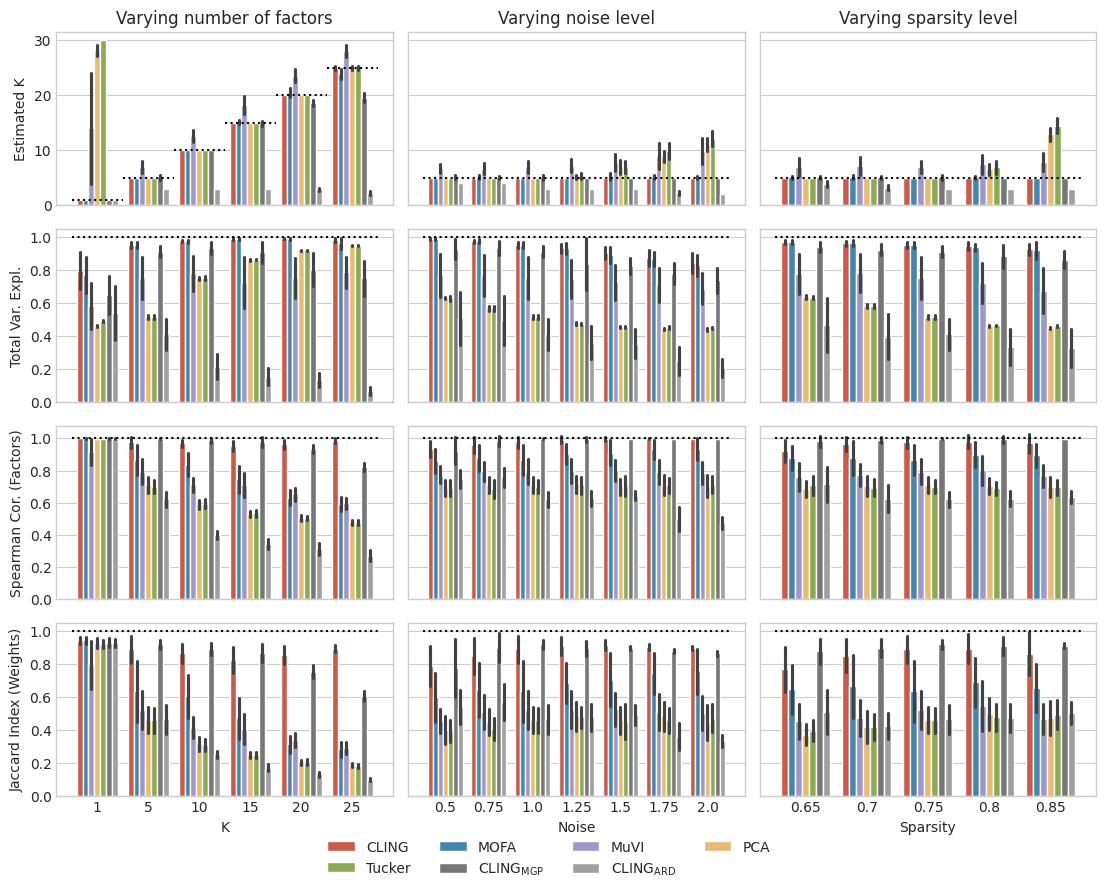

In [14]:
plot_figure(df, 5)
plt.savefig("figures/sim_par_1.pdf", bbox_inches="tight")
plt.show()

## Figure B.1 supplement (param_sim_2)

In [16]:
df = []
df_list = ['model_pca_0.01',
           'model_mofa_prune_0.01', 
           'model_tucker_0.01',
           'model_muvi_0.01',
           'model_cling_AD_fast_new',
           'model_cling_ablation1', 'model_cling_ablation1a', 'model_cling_ablation2a'
           ]


for i in df_list:
    df_tmp = pd.read_csv('param_sim_2/'+i+'.csv')
    if i == 'model_muvi_0.01':
        df_tmp.drop_duplicates(inplace=True)
    df.append(df_tmp)
df = pd.concat(df)


# filter out results we don't need
df = df[df['K'].isin([1, 5, 7, 10, 20, 30])]
df = df[df['noise_std'].isin([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])]
df = df.reset_index()

# change names of models
df['model'] = df['model'].replace(model_names)

# define scenarios
df['scenario1'] = ((df['noise_std'] == 1) & (df['sparsity'] == 0.8))
df['scenario2'] = ((df['K'] == 10) & (df['sparsity'] == 0.8))
df['scenario3'] = ((df['K'] == 10) & (df['noise_std'] == 1))

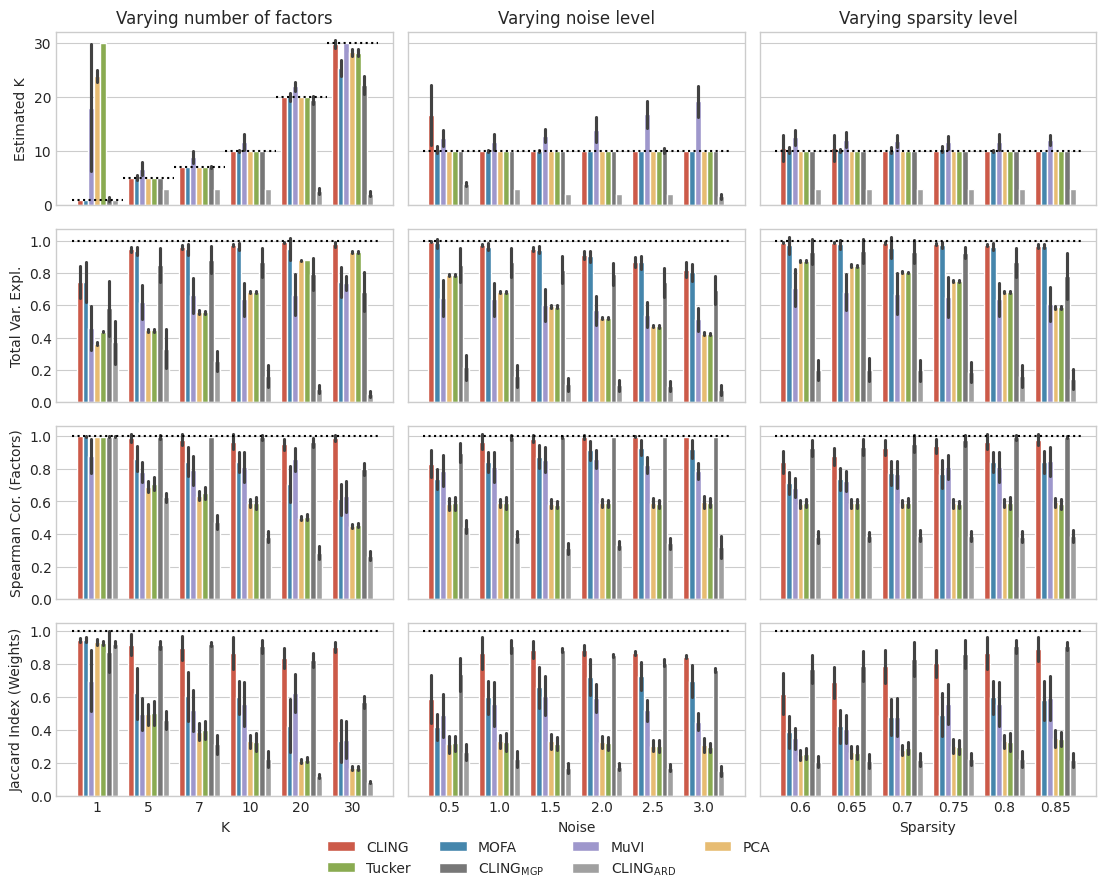

In [19]:
plot_figure(df, 10)
plt.savefig("figures/sim_par_2.pdf")
plt.show()

## Figure B.2 supplement (param_sim_3)

In [ ]:
df = []
df_list = ['model_pca_0.01',
           'model_mofa_prune_0.01', 
           'model_tucker_0.01',
           'model_muvi_0.01',
           'model_cling_AD_fast_new',
           'model_cling_ablation1', 'model_cling_ablation1a', 'model_cling_ablation2a'
           ]


for i in df_list:
    df_tmp = pd.read_csv('param_sim_3/'+i+'.csv')
    df.append(df_tmp)
df = pd.concat(df)


# filter out results we don't need
# df = df[df['K'].isin([5, 10, 20, 30, 40, 50])]
# df = df[df['noise_std'].isin([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])]
df = df.reset_index()
df['noise_std'] = df['noise_level']
df['sparsity'] = (1 - df['theta_level']).round(1)
df = df[df['sparsity'] < 1]

# change names of models
df['model'] = df['model'].replace(model_names)

# define scenarios
df['scenario1'] = ((df['noise_std'] == 0.2) & (df['sparsity'] == 0.8))
df['scenario2'] = ((df['K'] == 5) & (df['sparsity'] == 0.8))
df['scenario3'] = ((df['K'] == 5) & (df['noise_std'] == 0.2))

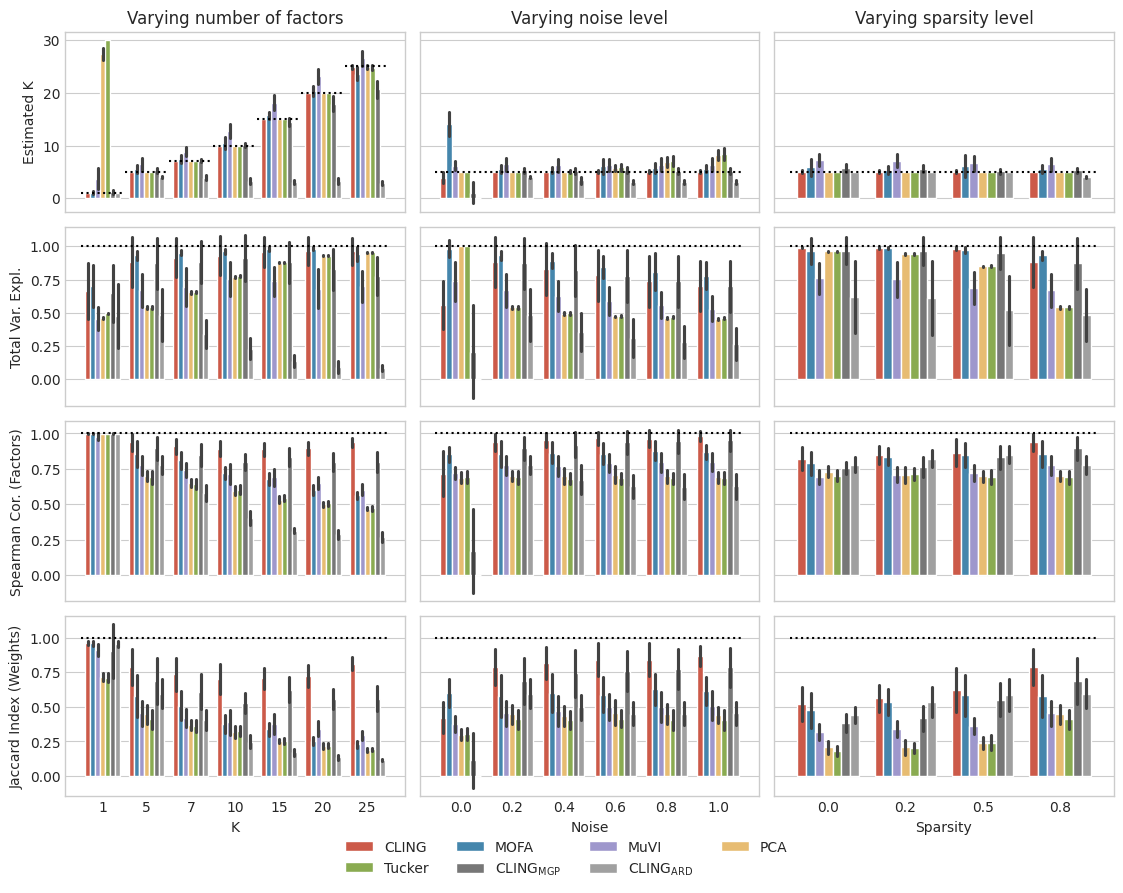

In [21]:
plot_figure_mofa(df, 5)
plt.savefig("figures/sim_par_3.pdf")
plt.show()

# Threshold sensitivity 

## Figure B.3 supplement

In [22]:
model_names = {
    'model_cling_AD_fast_0.005': 'CLING (0.005)',
    'model_cling_AD_fast_0.01': 'CLING (0.01)',
    'model_cling_AD_fast_0.02': 'CLING (0.02)',    
    'model_mofa_prune_0.005': 'MOFA (0.005)',
    'model_mofa_prune_0.01': 'MOFA (0.01)',
    'model_mofa_prune_0.02': 'MOFA (0.02)',
    
}

In [23]:
colors = ["#EE9285",'#E24A33','#882C1F', '#85B9D7','#348ABD','#1F5371']

In [24]:
color_dict = {
    "CLING (0.005)": colors[0],       
    "CLING (0.01)": colors[1],      
    "CLING (0.02)": colors[2],     
    "MOFA (0.005)": colors[3],  
    "MOFA (0.01)": colors[4],
    "MOFA (0.02)": colors[4]
}

In [25]:
hue_order = color_dict.keys()

In [26]:
df = []
df_list = ['model_mofa_prune_0.01', 'model_mofa_prune_0.02', 'model_mofa_prune_0.005',
            'model_cling_AD_fast_0.01', 'model_cling_AD_fast_0.02', 'model_cling_AD_fast_0.005']

for i in df_list:
    df_tmp = pd.read_csv('param_sim_1/'+i+'.csv')
    df.append(df_tmp)
df = pd.concat(df)

df = df.melt(id_vars=['N', 'K', 'D', 'noise_std', 'sparsity', 'seed', 'model', 'tres'],
        value_vars=["K_est", "Var_exp_views", "Var_exp_total", "Cor_factors", 'Jaccard_index', 'Cor_weights'],
        var_name="score_type", value_name="score")

df = df[df['K'].isin([1, 5, 10, 15, 20, 25])]

df1 = df[(df['noise_std'] == 1) & (df['sparsity'] == 0.75) & (df['score_type'] == 'K_est')]
df1['scenario'] = 'A'

/tmp/ipykernel_1219631/2840540035.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['scenario'] = 'A'


In [27]:
df = []
df_list = ['model_mofa_prune_0.01', 'model_mofa_prune_0.02', 'model_mofa_prune_0.005',
            'model_cling_AD_fast_0.01', 'model_cling_AD_fast_0.02', 'model_cling_AD_fast_0.005']

for i in df_list:
    df_tmp = pd.read_csv('param_sim_2/'+i+'.csv')
    df.append(df_tmp)
df = pd.concat(df)

df = df.melt(id_vars=['N', 'K', 'D', 'noise_std', 'sparsity', 'seed', 'model', 'tres'],
        value_vars=["K_est", "Var_exp_views", "Var_exp_total", "Cor_factors", 'Jaccard_index', 'Cor_weights'],
        var_name="score_type", value_name="score")

df = df[df['K'].isin([1, 5, 7, 10, 20, 30])]

df2 = df[(df['noise_std'] == 1) & (df['sparsity'] == 0.8) & (df['score_type'] == 'K_est')]
df2['scenario'] = 'B'

/tmp/ipykernel_1219631/1403865398.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['scenario'] = 'B'


In [28]:
df = pd.concat([df1, df2], ignore_index=True)
df['model'] = df['model'].replace(model_names)

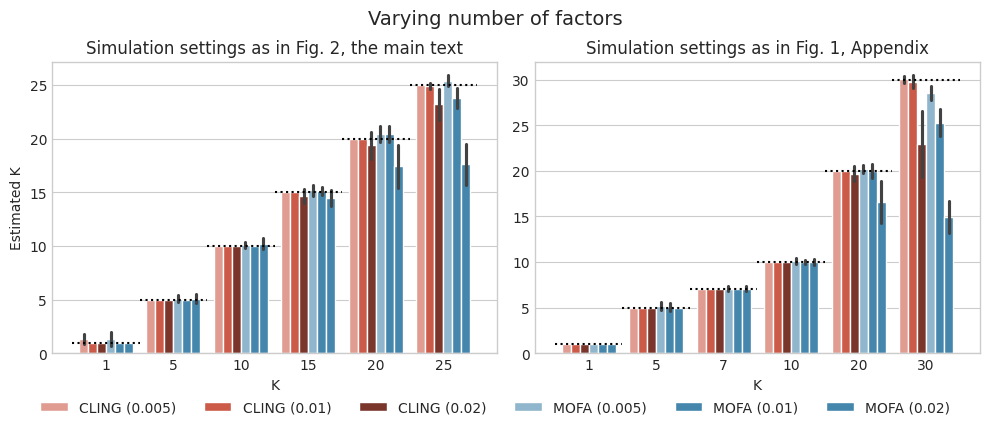

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), sharex='col', sharey=False)

flier_props = dict(marker='o', markersize=3, alpha=0.6)

x_axis_names = ['K']
x_axis_names_nice = ['K']
y_axis_names = ['Estimated K']
titles_scenarios = ['Varying number of factors']

for j, scenario in enumerate(["A", "B"]):
    df_tmp = df.loc[df['scenario']==scenario, :]
    sns.barplot(df_tmp, x=x_axis_names[0], y='score', hue='model', hue_order=hue_order, ax=axes[j], palette=color_dict,
                errorbar=("sd"))
    for k_ind, k in enumerate(np.sort(df_tmp['K'].unique())):
        axes[j].hlines(y=k, xmin=k_ind-0.5, xmax=k_ind+0.5, linestyle='dotted', color='black')
    if j==0:
        axes[j].set_title('Simulation settings as in Fig. 2, the main text')
    if j==1:
        axes[j].set_title('Simulation settings as in Fig. 1, Appendix')
        
    axes[j].get_legend().remove()
axes[0].set_ylabel(y_axis_names[0])
axes[1].set_ylabel('')


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, 0.005), ncol=6)

fig.text(0.5, 0.9, "Varying number of factors",
         ha='center', fontsize=14)
plt.tight_layout(rect=[0, 0.05, 1, 0.9])
plt.savefig("figures/treshold_robustness.pdf")